In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [98]:
X,y=make_moons(n_samples=250, noise=0.5)

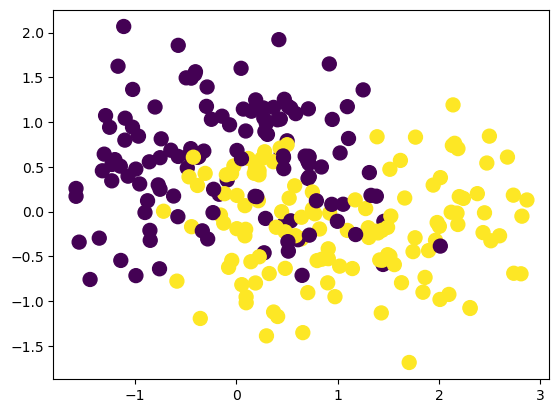

In [99]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [100]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(1) # shape [250,1]


In [101]:
dataset = TensorDataset(X_tensor,y_tensor)
dataloader = DataLoader(dataset,batch_size=32,shuffle=True)

In [ ]:
class DeepSigmoidNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(2, 10)
        self.fc2=nn.Linear(10,10)
        self.fc3=nn.Linear(10,10)
        self.fc4=nn.Linear(10,10)
        self.fc5=nn.Linear(10,10)
        self.fc6=nn.Linear(10,10)
        self.fc7=nn.Linear(10,10) 
        self.fc8=nn.Linear(10,10)
        self.fc4=nn.Linear(10,10)
        self.fc5=nn.Linear(10,10)
        self.output=nn.Linear(10,1)
        
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.activation(self.fc6(x))
        x = self.activation(self.fc7(x))
        x = self.activation(self.fc8(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = torch.sigmoid(self.output(x))  # Final output for binary classification
        return x
        

In [103]:
model = DeepReluNN()
loss_fun= nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [104]:
old_weight = model.fc1.weight.clone().detach()
old_weight

tensor([[ 0.3808, -0.4668],
        [-0.4133,  0.0777],
        [-0.2803, -0.6730],
        [-0.2353, -0.4220],
        [-0.6600,  0.4134],
        [ 0.6017,  0.4764],
        [ 0.2935,  0.6871],
        [ 0.4278, -0.5874],
        [-0.6637,  0.1907],
        [ 0.2001,  0.1861]])

In [105]:
def compute_accuracy(preds, labels):
    preds = (preds > 0.5).float()
    correct = (preds == labels).sum().item()
    return correct/labels.size(0)

In [106]:
epochs=10
for epoch in range(epochs):
    total_loss = 0
    total_acc =0
    
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs =model(batch_X)
        loss = loss_fun(outputs, batch_y)
        loss.backward()
        print("Grad of fc1:", model.fc1.weight.grad.norm().item())
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += compute_accuracy(outputs, batch_y)
        
    avg_loss = total_loss/ len(dataloader)
    avg_acc = total_acc / len(dataloader)
    
    print(f"Epoch: {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Accuracy: {avg_acc:.4f}")
    
        

Grad of fc1: 1.1706701116054319e-05
Grad of fc1: 1.4134911907603964e-05
Grad of fc1: 1.2569397767947521e-05
Grad of fc1: 9.242511623597238e-06
Grad of fc1: 5.558270004257793e-06
Grad of fc1: 9.813786164158955e-06
Grad of fc1: 6.926912647031713e-06
Grad of fc1: 1.073492876457749e-05
Epoch: 1/10 | Loss: 0.7001 | Accuracy: 0.4982
Grad of fc1: 9.137615052168258e-06
Grad of fc1: 7.577290944027482e-06
Grad of fc1: 8.473733942082617e-06
Grad of fc1: 4.697256827057572e-06
Grad of fc1: 7.139913122955477e-06
Grad of fc1: 5.073792635812424e-06
Grad of fc1: 7.462997928087134e-06
Grad of fc1: 5.763187346019549e-06
Epoch: 2/10 | Loss: 0.6985 | Accuracy: 0.5000
Grad of fc1: 6.843074061180232e-06
Grad of fc1: 7.986382115632296e-06
Grad of fc1: 7.279739293153398e-06
Grad of fc1: 3.660485845102812e-06
Grad of fc1: 5.678788056684425e-06
Grad of fc1: 4.389833975437796e-06
Grad of fc1: 8.724097824597266e-06
Grad of fc1: 5.126567430124851e-06
Epoch: 3/10 | Loss: 0.6971 | Accuracy: 0.5009
Grad of fc1: 6.0764

In [107]:
new_weight = model.fc1.weight.clone().detach() 

In [108]:
new_weight

tensor([[ 0.4186, -0.4546],
        [-0.4133,  0.0777],
        [-0.2595, -0.6953],
        [-0.1853, -0.4563],
        [-0.7532,  0.5102],
        [ 0.5898,  0.5202],
        [ 0.2196,  0.7665],
        [ 0.4746, -0.5710],
        [-0.7417,  0.2214],
        [ 0.2936,  0.0982]])

In [109]:
old_weight

tensor([[ 0.3808, -0.4668],
        [-0.4133,  0.0777],
        [-0.2803, -0.6730],
        [-0.2353, -0.4220],
        [-0.6600,  0.4134],
        [ 0.6017,  0.4764],
        [ 0.2935,  0.6871],
        [ 0.4278, -0.5874],
        [-0.6637,  0.1907],
        [ 0.2001,  0.1861]])

In [110]:
# calculating new grads 

gradient_dl_dw = (old_weight - new_weight)/0.001
percent_change = abs(100*(old_weight - new_weight)/old_weight)

In [111]:
gradient_dl_dw

tensor([[-37.7842, -12.2369],
        [  0.0000,   0.0000],
        [-20.8143,  22.3185],
        [-49.9624,  34.3378],
        [ 93.2304, -96.8305],
        [ 11.9582, -43.7936],
        [ 73.8740, -79.3372],
        [-46.8425, -16.3506],
        [ 78.0964, -30.6852],
        [-93.4198,  87.8733]])

In [112]:
percent_change

tensor([[ 9.9231,  2.6213],
        [ 0.0000,  0.0000],
        [ 7.4247,  3.3163],
        [21.2328,  8.1378],
        [14.1267, 23.4255],
        [ 1.9873,  9.1917],
        [25.1685, 11.5464],
        [10.9497,  2.7836],
        [11.7677, 16.0924],
        [46.6770, 47.2176]])

vgp result before reducing no of layers

In [113]:
# gradient change =tensor([ 
#         [ 0.0448, -0.0476],
#         [-0.2128,  0.1796],
#         [ 0.4925, -0.3864],
#         [ 0.4935, -0.3706],
#         [-0.0065, -0.0058],
#         [ 0.6472, -0.4756],
#         [ 0.0927, -0.0695],
#         [ 0.1076, -0.0743],
#         [-0.6312,  0.5028],
#         [-0.3037,  0.2610]])

Results after reducing no. of layers 

In [114]:
# percent_change = tensor([
#         [  61.1749,   19.5349],
#         [1000.1516,   14.1364],
#         [  30.6946,   18.8138],
#         [  53.6735,   31.1321],
#         [  11.3543,   75.2933],
#         [  27.9173,    9.4952],
#         [  37.3605,  144.9224],
#         [  13.7372,   48.4270],
#         [  10.9983,   18.9258],
#         [  21.6259,  160.5358]])


# gradient = tensor([
#         [ 73.8398, -73.1962],
#         [ 69.4607, -69.7715],
#         [-90.7436,  90.4319],
#         [ 67.1418, -67.2083],
#         [ 72.8164, -74.4471],
#         [ 34.5214, -32.2869],
#         [-84.6676,  84.3552],
#         [-80.5159,  80.4206],
#         [ 76.4807, -78.5643],
#         [ 70.7073, -71.7952]])